In [7]:
import numpy as np
import os
import pandas as pd
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


### file directory

In [3]:
current_dir = os.getcwd()
root_dir = os.path.abspath(os.path.join(current_dir, os.pardir))

#train file
train_file = os.path.join(root_dir, "data", "train.csv")

#model file
model_file = os.path.join(root_dir,"model", "prediction_model.pkl")

## read csv data distribution on the training

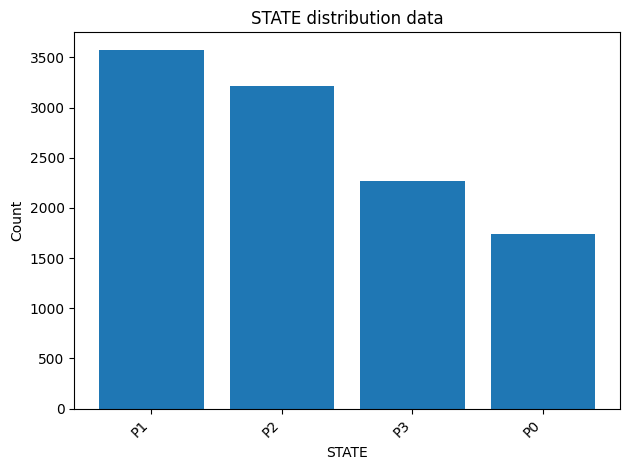

In [4]:
import matplotlib.pyplot as plt

try:
    data = pd.read_csv(train_file, delimiter=',')
    X = data[['lat [deg]', 'lon [deg]', 'sog [kn]', 'heading [deg]', 'cog [deg]']]
    y = data['STATE']

    # Create a bar chart with 'STATE' as the x-axis and counts as the y-axis
    plt.bar(y.value_counts().index, y.value_counts().values)

    # Customize the plot for clarity
    plt.xlabel('STATE')  # Label the x-axis
    plt.ylabel('Count')  # Label the y-axis
    plt.title('STATE distribution data')  # Add a title
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout for better spacing

    plt.show()  # Display the plot

except FileNotFoundError:
    print("Error: train_file not found.")


## training function
### i use 80/20 distribution due to the small amout of data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

try:
    model = RandomForestClassifier()
    model.fit(X_train, y_train)

except:
    print("Rows with NaN values in X_train:")
    print(X_train[X_train.isna().any(axis=1)])


In [6]:
joblib.dump(model, model_file)

['c:\\Users\\abinp\\Documents\\ITS\\semester 8\\commision\\AIS-Data-Process\\model\\prediction_model.pkl']

In [10]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("F1-score:", f1)


Accuracy scores: [0.77595227 0.91828522 0.93633566 0.98117443 0.9479147 ]
Mean accuracy: 0.9119324568927116
F1-scores: [0.77595227 0.91828522 0.93633566 0.98117443 0.9479147 ]
Mean F1-score: 0.9119324568927116
